In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


house_data = pd.read_csv('kc_house_data.csv')
print('total rows', house_data.shape[0]) 
print('total columns',house_data.shape[1]) 

###### DOING SOME DATA VISUALIZATION ######

#sns.pairplot(house_data)
#plt.tight_layout()  



total rows 21613
total columns 21


In [2]:
show_data = house_data.describe()
pd.options.display.float_format = '{:.1f}'.format
print(show_data)

                id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
count      21613.0   21613.0   21613.0    21613.0      21613.0   21613.0   
mean  4580301520.9  540088.1       3.4        2.1       2079.9   15107.0   
std   2876565571.3  367127.2       0.9        0.8        918.4   41420.5   
min      1000102.0   75000.0       0.0        0.0        290.0     520.0   
25%   2123049194.0  321950.0       3.0        1.8       1427.0    5040.0   
50%   3904930410.0  450000.0       3.0        2.2       1910.0    7618.0   
75%   7308900445.0  645000.0       4.0        2.5       2550.0   10688.0   
max   9900000190.0 7700000.0      33.0        8.0      13540.0 1651359.0   

       floors  waterfront    view  condition   grade  sqft_above  \
count 21613.0     21613.0 21613.0    21613.0 21613.0     21613.0   
mean      1.5         0.0     0.2        3.4     7.7      1788.4   
std       0.5         0.1     0.8        0.7     1.2       828.1   
min       1.0         0.0     0.0        1.

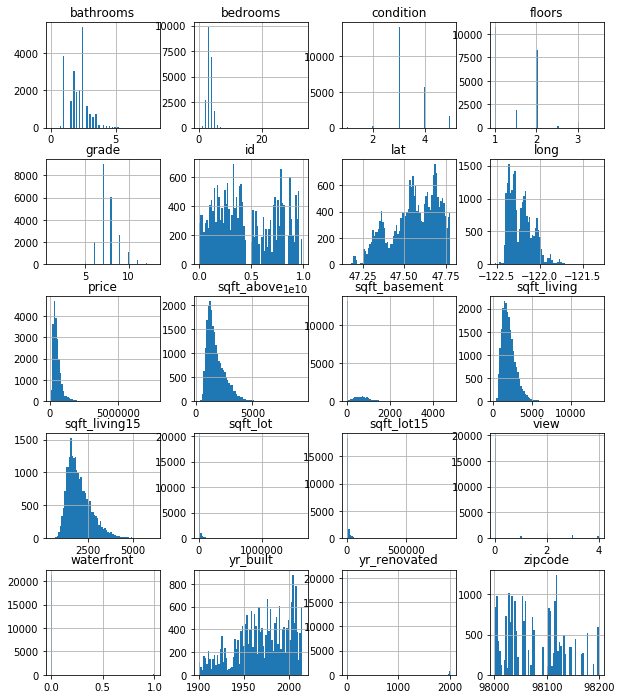

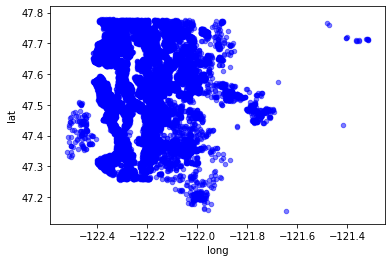

In [3]:
house_data.hist(bins=70, figsize=(10,12))
plt.show()

house_data.plot(kind="scatter", x="long", y="lat", alpha=0.5, color= 'blue')
plt.show()

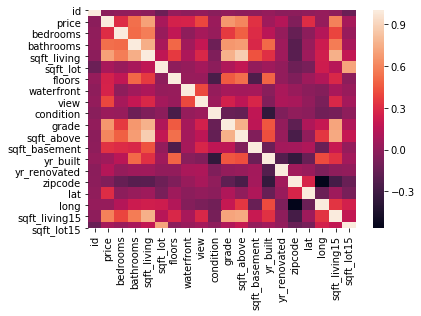

In [4]:
cor_relation = house_data.corr()
sns.heatmap(cor_relation)

In [5]:
from sklearn.model_selection import train_test_split

######## DATA PREPROCESS #######

print(house_data.columns[house_data.isnull().any()])


#print(house_data.describe())

#print(house_data.head(15))


independent_v = house_data.drop(['price','date', 'id'], axis =1)
#print(independent_v.head(10))

dependent_v = house_data['price']
#print(dependent_v.head(10))

independent_train, independent_test, dependent_train, dependent_test = train_test_split(independent_v, dependent_v, test_size = 0.25,random_state = 20)

print("done with splitting dataset")

#print(independent_train)
#print(independent_test)
#print(dependent_train)
#print(dependent_test)


Index([], dtype='object')
done with splitting dataset


In [6]:
#### LINEAR REGRESSION MODEL ####
from sklearn.linear_model import LinearRegression

l_regression = LinearRegression()
l_regression.fit(independent_train, dependent_train)

print("interecpt is", l_regression.intercept_)
#print("coeffiecient for each features is", l_regression.coef_)
print("Score for training is: ",l_regression.score(independent_train,dependent_train))

print("Score for testing is: ",l_regression.score(independent_test,dependent_test))


# Now we are gonna predict y using  x feature test and train data 
dependent_predict = l_regression.predict(independent_test)

#print(dependent_predict[0:10])
#print(dependent_test[0:10])  # checking how testing and predicting set differs

coeff_dataframe = pd.DataFrame(l_regression.coef_, independent_v.columns, columns=['Coefficient'])  
coeff_dataframe



interecpt is 5956167.15489738
Score for training is:  0.6973094333626098
Score for testing is:  0.7053126793137241


,Coefficient
bedrooms,-41343.4
bathrooms,48154.2
sqft_living,111.3
sqft_lot,0.1
floors,4746.0
waterfront,532525.6
view,53728.8
condition,25947.3
grade,93950.2
sqft_above,71.5


In [7]:
### NOW  CHECK MODEL PERFORMANCE OR ACCURACY USING RMSE(ROOT MEAN SQAURED ERROR) ###

# we will check using sklearn

from sklearn.metrics import mean_squared_error

error_val = mean_squared_error(dependent_test, dependent_predict)
e1 = np.sqrt(error_val)


print(" RMSE FOR TESTING SET: ",e1)



 RMSE FOR TESTING SET:  201956.68066221007


In [8]:
### Now see data frame for actual and predicted values ###

dataFrame2 = pd.DataFrame({'Actual': dependent_test, 'Predicted': dependent_predict})
print(dataFrame2.head(20))


         Actual  Predicted
2212   550000.0   507150.2
16859  202000.0   -54053.1
21053  775900.0   670820.2
7757   224950.0   161351.7
12278  312000.0   531015.2
13290  272450.0   191742.7
7992    90000.0   226579.1
8952   522000.0   577203.0
20535 2950000.0  1295209.9
20894 1095000.0   714595.6
14477  153500.0   211447.6
10843  590000.0   806088.8
2178   234000.0   188120.9
5279   368000.0   428550.1
8280   359950.0   477927.3
9853   448175.0   409418.5
4077   875000.0   399629.9
9395   285000.0   262507.3
16760  465000.0   617926.8
19196 1185000.0  1024829.6


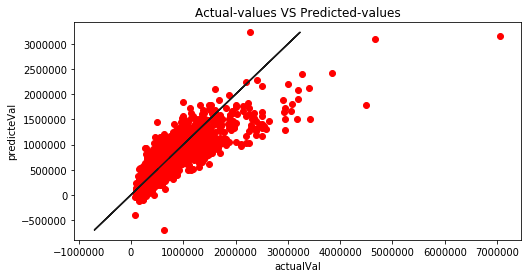

In [9]:
### Now we graph the plot to see if most of the points closer to the line ##

plt.figure(figsize=(8, 4))
plt.scatter(dependent_test, dependent_predict, color = 'red')
plt.plot(dependent_predict, dependent_predict, ls="-", c=".10")
plt.title('Actual-values VS Predicted-values')
plt.xlabel('actualVal')
plt.ylabel('predicteVal')
plt.show()


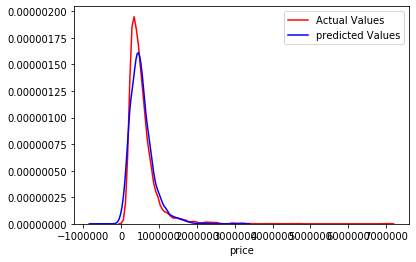

In [10]:
ax1 = sns.distplot(dependent_test, hist=False, color="r", label="Actual Values")
sns.distplot(dependent_predict, hist=False, color="b", label="predicted Values" , ax=ax1)

(21613, 22)
0    16289
1     5324
Name: price_high, dtype: int64


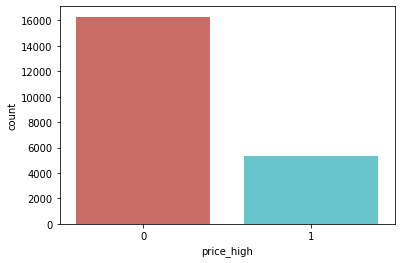

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price_high,,,,,,,,,,,,,,,,,,,,
0,4602216606.3,392819.8,3.2,1.9,1777.5,13091.3,1.4,0.0,0.1,3.4,7.3,1542.9,234.6,1970.4,60.1,98079.3,47.5,-122.2,1778.7,11631.8
1,4513251403.2,990661.9,3.8,2.7,3005.2,21274.0,1.7,0.0,0.6,3.5,8.8,2539.5,465.7,1972.8,158.8,98073.6,47.6,-122.2,2622.6,16246.1


<Figure size 432x288 with 0 Axes>

In [11]:
### HOUSE PRICE PREDICTION USING LOGISTIC REGRESSION ###
## BINARIZATION ## 

#house_data.head(15)
#print('total rows', house_data.shape[0]) 
# so we want to predict house price using logistic regression here. as our data set doesn't have the categoriacal value, 
# we did Binarization which showing house price greater or equal to $650,000 has value 1 which means the price is high,
# value 0 means price is not high so it's affordable. So we made 1 more column or feauture in our dataset called price_high.
# so we will use logistic regression to predict if house price is high or not based on some features already we have in our dataset.
# below it has binary value 0 and price high has binary value 1
#print(house_data.median()) 

price_high = np.array(house_data['price'])

list1 = []
    
for price in price_high:
    if price >= 650000:     ##estimating the price by setting the threshold
        list1.append(1) # yes, price is high
    else:
        list1.append(0) # NO, price is not high


house_data['price_high'] = list1 

#house_data.head(10)
print(house_data.shape)     

total = house_data['price_high'].value_counts()
print(total)   # HERE WE GOT below median 0 which is 10692 and above median 1 which is total  10921

sns.countplot(x = 'price_high', data = house_data, palette = 'hls')
plt.show()
house_data.groupby('price_high').mean()
#house_data.head(5)


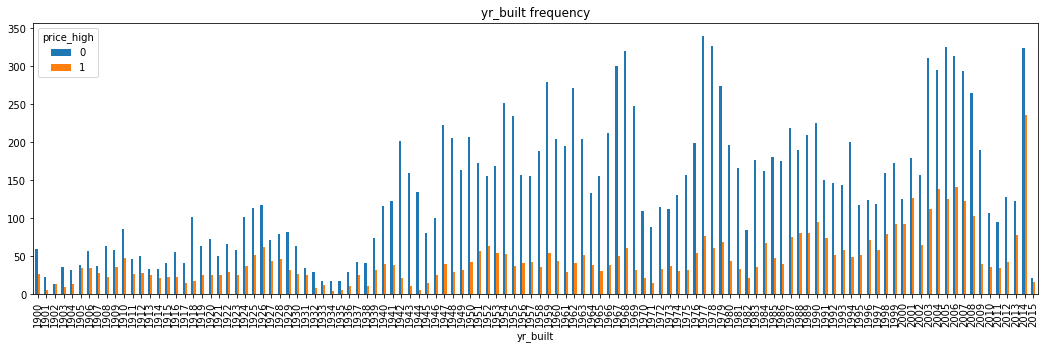

In [12]:
### DOING SOME VISULAIZATION ###
pd.crosstab(house_data.yr_built, house_data.price_high).plot(kind='bar',figsize=(18,5) )
plt.title('yr_built frequency')
plt.savefig('yearBulit')

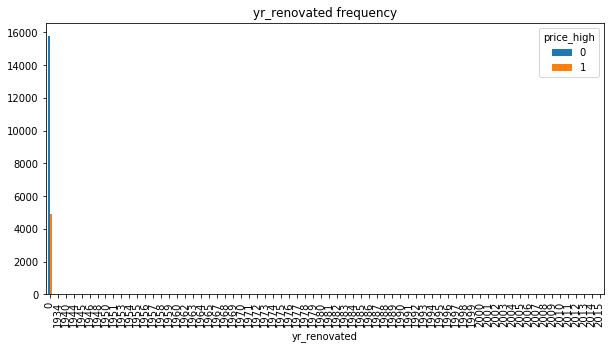

In [13]:
pd.crosstab(house_data.yr_renovated, house_data.price_high).plot(kind='bar',figsize=(10,5) )
plt.title('yr_renovated frequency')
plt.savefig('yearRenovated')    #This doesn't seem good predictor for outcome varibale


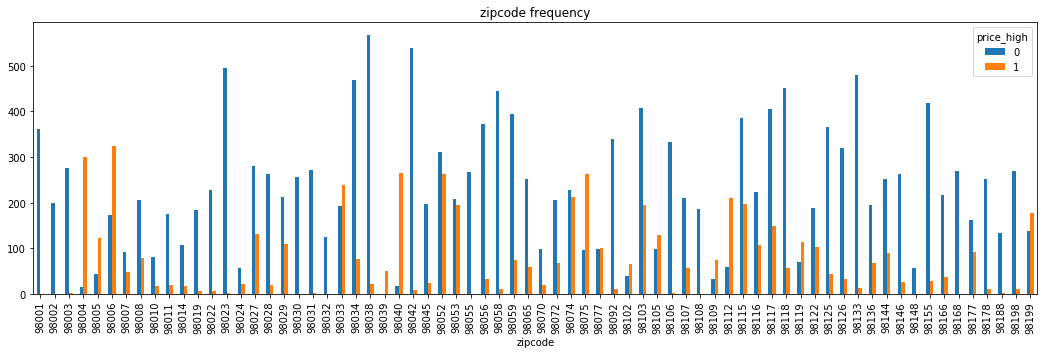

In [14]:
pd.crosstab(house_data.zipcode, house_data.price_high).plot(kind='bar',figsize=(18,5) )
plt.title('zipcode frequency')

In [15]:
### Data preprocess for logistic regression model ###

all_x = house_data.drop([ 'price_high', 'date'], axis =1)
#print(all_x.head(5))

y_val = house_data['price_high']
#print(y_val.head(5))


pricey = all_x.loc[y_val == 1]
#print(pricey.head(5))
not_pricey = all_x.loc[y_val == 0]
#print(not_pricey)

l_dataframe = pd.DataFrame(all_x)
x_independent_all = l_dataframe.drop(['waterfront', 'condition', 'lat', 'long', 'yr_renovated'], axis = 1)  # we dropped this bcoz it doesn't matter to the high price
#print(x_independent_all)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.7501850481125093
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      4079
           1       0.49      0.57      0.53      1325

    accuracy                           0.75      5404
   macro avg       0.67      0.69      0.68      5404
weighted avg       0.76      0.75      0.76      5404



Text(0.5, 15.0, 'Predicted label')

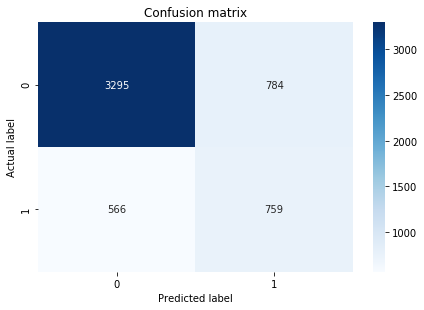

In [16]:
### LOGISTIC REGRESSION MODEL USING SKLEARN ###

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

feature_train, feature_test, target_train, target_test = train_test_split(x_independent_all, y_val, test_size = 0.25,random_state = 20)
#print(feature_train)
#print(feature_test)
#print(target_train)
#print(target_test)

logistic = LogisticRegression()
logistic.fit(feature_train, target_train)

target_predict = logistic.predict(feature_test)

print('Accuracy of logistic regression classifier on test set:', logistic.score(feature_test, target_test))
print(classification_report(target_test, target_predict))

confu_matrix = confusion_matrix(target_test, target_predict)


axis = sns.heatmap(pd.DataFrame(confu_matrix), annot=confu_matrix, cmap="Blues" ,fmt='g')
bottom, top = axis.get_ylim()
axis.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
### IMPROVING MODEL BY DOING MIN_MAX_SCALER ###
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x_independent_all)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.930421909696521
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4079
           1       0.93      0.78      0.85      1325

    accuracy                           0.93      5404
   macro avg       0.93      0.88      0.90      5404
weighted avg       0.93      0.93      0.93      5404



Text(0.5, 15.0, 'Predicted label')

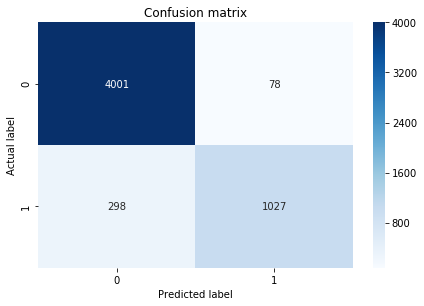

In [18]:
#### improving the model #####

features_train, features_test, targets_train, targets_test = train_test_split(X_scale, y_val, test_size = 0.25,random_state = 20)
#print(feature_train)

logistic = LogisticRegression()
logistic.fit(features_train, targets_train)

targets_predict = logistic.predict(features_test)

print('Accuracy of logistic regression classifier on test set:', logistic.score(features_test, targets_test))
print(classification_report(targets_test, targets_predict))

confus_matrix = confusion_matrix(targets_test, targets_predict)


axis = sns.heatmap(pd.DataFrame(confus_matrix), annot=confus_matrix, cmap="Blues" ,fmt='g')
bottom, top = axis.get_ylim()
axis.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [19]:
### NEURAL NETWORK MEODEL ###
## WITH IMPROVING THE MODEL ##
import keras
from keras.models import Sequential
from keras.layers import Dense

x_t, x_te, y_t, y_te = train_test_split(X_scale, y_val, test_size = 0.25,random_state = 42)
x_v, x_tes, y_v, y_tes = train_test_split(x_te, y_te, test_size = 0.5)

model = Sequential()
model.add(Dense(35, input_dim = 15, activation = 'relu'))
model.add(Dense(35, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

          

model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

chart = model.fit(x_t, y_t, batch_size=20, epochs=100, validation_data=(x_v, y_v))

Using TensorFlow backend.


Train on 16209 samples, validate on 2702 samples
Epoch 1/100
16209/16209 [==============================] - 1s 85us/step - loss: 0.5461 - accuracy: 0.7572 - val_loss: 0.5233 - val_accuracy: 0.7461
Epoch 2/100
16209/16209 [==============================] - 1s 73us/step - loss: 0.4680 - accuracy: 0.7796 - val_loss: 0.4316 - val_accuracy: 0.7979
Epoch 3/100
16209/16209 [==============================] - 2s 93us/step - loss: 0.3734 - accuracy: 0.8361 - val_loss: 0.3462 - val_accuracy: 0.8638
Epoch 4/100
16209/16209 [==============================] - 2s 105us/step - loss: 0.3154 - accuracy: 0.8701 - val_loss: 0.3071 - val_accuracy: 0.8768
Epoch 5/100
16209/16209 [==============================] - 2s 96us/step - loss: 0.2893 - accuracy: 0.8796 - val_loss: 0.2871 - val_accuracy: 0.8860
Epoch 6/100
16209/16209 [==============================] - 1s 92us/step - loss: 0.2747 - accuracy: 0.8853 - val_loss: 0.2758 - val_accuracy: 0.8893
Epoch 7/100
16209/16209 [==============================] - 2s 

Epoch 56/100
16209/16209 [==============================] - 1s 76us/step - loss: 0.0534 - accuracy: 0.9777 - val_loss: 0.0374 - val_accuracy: 0.9941
Epoch 57/100
16209/16209 [==============================] - 1s 71us/step - loss: 0.0552 - accuracy: 0.9761 - val_loss: 0.0410 - val_accuracy: 0.9845
Epoch 58/100
16209/16209 [==============================] - 1s 71us/step - loss: 0.0581 - accuracy: 0.9772 - val_loss: 0.0401 - val_accuracy: 0.9900
Epoch 59/100
16209/16209 [==============================] - 1s 71us/step - loss: 0.0506 - accuracy: 0.9806 - val_loss: 0.0829 - val_accuracy: 0.9597
Epoch 60/100
16209/16209 [==============================] - 1s 71us/step - loss: 0.0547 - accuracy: 0.9779 - val_loss: 0.0364 - val_accuracy: 0.9896
Epoch 61/100
16209/16209 [==============================] - 1s 71us/step - loss: 0.0505 - accuracy: 0.9798 - val_loss: 0.0973 - val_accuracy: 0.9534
Epoch 62/100
16209/16209 [==============================] - 1s 71us/step - loss: 0.0513 - accuracy: 0.9784

In [21]:
model.evaluate(x_tes, y_tes)


2702/2702 [==============================] - 0s 25us/step


[0.030821441589330055, 0.9907475709915161]

In [22]:
## CHECKING THE PPERFORMANCE ##
from sklearn.metrics import confusion_matrix
pred1 = model.predict(x_tes)
pred1 = (pred1 > 0.5)

confusion_m1 = confusion_matrix(y_tes, pred1)
print(confusion_m1)

print(classification_report(y_tes, pred1))

[[1998    1]
 [  24  679]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1999
           1       1.00      0.97      0.98       703

    accuracy                           0.99      2702
   macro avg       0.99      0.98      0.99      2702
weighted avg       0.99      0.99      0.99      2702



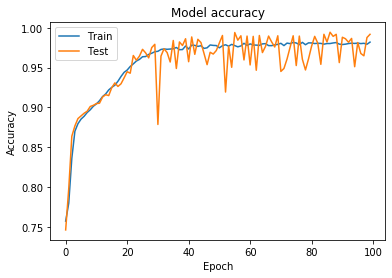

In [23]:
plt.plot(chart.history['accuracy'])
plt.plot(chart.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

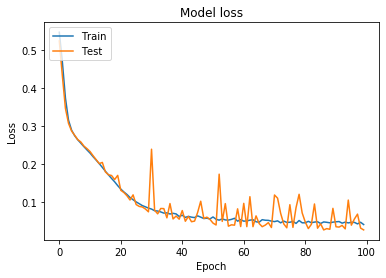

In [24]:
plt.plot(chart.history['loss'])
plt.plot(chart.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
### WITHOUT IMPROVING THE MODEL ###
import keras
from keras.models import Sequential
from keras.layers import Dense


x_train, x_test, y_train, y_test = train_test_split(x_independent_all, y_val, test_size = 0.25,random_state = 42)
x_val, x_tests, y_val, y_tests = train_test_split(x_test, y_test, test_size = 0.5)

model2 = Sequential()
model2.add(Dense(35, input_dim = 15, activation = 'relu'))
model2.add(Dense(35, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

          

model2.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

chart2 = model2.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_val, y_val))

Train on 16209 samples, validate on 2702 samples
Epoch 1/100
16209/16209 [==============================] - 1s 88us/step - loss: 315663591092410275365650432.0000 - accuracy: 0.7566 - val_loss: 0.5749 - val_accuracy: 0.7395
Epoch 2/100
16209/16209 [==============================] - 1s 75us/step - loss: 0.5551 - accuracy: 0.7576 - val_loss: 0.5739 - val_accuracy: 0.7395
Epoch 3/100
16209/16209 [==============================] - 1s 87us/step - loss: 0.5539 - accuracy: 0.7576 - val_loss: 0.5744 - val_accuracy: 0.7395s - loss: 0.5537 - accuracy: 0.
Epoch 4/100
16209/16209 [==============================] - 1s 91us/step - loss: 0.5539 - accuracy: 0.7576 - val_loss: 0.5746 - val_accuracy: 0.7395
Epoch 5/100
16209/16209 [==============================] - 1s 85us/step - loss: 0.5539 - accuracy: 0.7576 - val_loss: 0.5745 - val_accuracy: 0.7395
Epoch 6/100
16209/16209 [==============================] - 2s 94us/step - loss: 0.5539 - accuracy: 0.7576 - val_loss: 0.5745 - val_accuracy: 0.7395
Epoch 

In [25]:
model2.evaluate(x_tests, y_tests)

2702/2702 [==============================] - 0s 23us/step


[0.5690279321084634, 0.7442635297775269]

In [26]:
### checking the performance ###
from sklearn.metrics import confusion_matrix
pred2 = model2.predict(x_tests)
pred2 = (pred2 > 0.5)

confusion_m2 = confusion_matrix(y_tests, pred2)
print(confusion_m2)

print(classification_report(y_tests, pred2))

[[2011    0]
 [ 691    0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      2011
           1       0.00      0.00      0.00       691

    accuracy                           0.74      2702
   macro avg       0.37      0.50      0.43      2702
weighted avg       0.55      0.74      0.64      2702



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


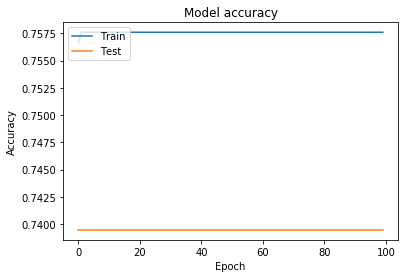

In [27]:
plt.plot(chart2.history['accuracy'])
plt.plot(chart2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

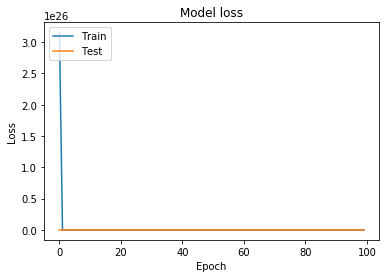

In [28]:
plt.plot(chart2.history['loss'])
plt.plot(chart2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()